In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD, RMSprop
from keras.datasets import mnist
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
batch_size = 32
nb_classes = 10
nb_epoch = 3

## Load MNIST dataset

In [3]:
(X_train_raw, Y_train_raw), (X_test_raw, Y_test_raw) = mnist.load_data()

### Reshape Data from image matrix to array & normalize


In [4]:
X_train = X_train_raw.reshape(X_train_raw.shape[0], X_train_raw.shape[1]*X_train_raw.shape[2]).astype('float32')
X_train /= 255.

X_test = X_test_raw.reshape(X_test_raw.shape[0], X_test_raw.shape[1]*X_test_raw.shape[2]).astype('float32')
X_test /= 255.

In [5]:
Y_train = np_utils.to_categorical(Y_train_raw)

Y_test = np_utils.to_categorical(Y_test_raw)

## Deep Multilayer Perceptron Model

In [6]:
model = Sequential()
model.add(Dense(output_dim=625, input_shape=(784,), init='normal'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(output_dim=625, input_shape=(625,), init='normal'))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(output_dim=10, input_shape=(625,), init='normal'))
model.add(Activation('softmax'))
          
model.compile(optimizer=RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 625)               490625    
_________________________________________________________________
activation_1 (Activation)    (None, 625)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 625)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 625)               391250    
_________________________________________________________________
activation_2 (Activation)    (None, 625)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 625)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                6260      
__________

/Users/mhuang/anaconda3/envs/keras2_py3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_shape=(784,), units=625, kernel_initializer="normal")`
  from ipykernel import kernelapp as app
/Users/mhuang/anaconda3/envs/keras2_py3/lib/python3.6/site-packages/ipykernel/__main__.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_shape=(625,), units=625, kernel_initializer="normal")`
/Users/mhuang/anaconda3/envs/keras2_py3/lib/python3.6/site-packages/ipykernel/__main__.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_shape=(625,), units=10, kernel_initializer="normal")`


## Train

In [7]:
history = model.fit(X_train, Y_train, nb_epoch=nb_epoch, batch_size=batch_size, validation_split=0.20, verbose=1)

/Users/mhuang/anaconda3/envs/keras2_py3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 48000 samples, validate on 12000 samples
Epoch 1/3
48000/48000 [==============================] - 44s 914us/step - loss: 0.2666 - acc: 0.9214 - val_loss: 0.1443 - val_acc: 0.9621
Epoch 2/3
48000/48000 [==============================] - 44s 920us/step - loss: 0.1465 - acc: 0.9635 - val_loss: 0.1343 - val_acc: 0.9703
Epoch 3/3
48000/48000 [==============================] - 44s 915us/step - loss: 0.1313 - acc: 0.9711 - val_loss: 0.1511 - val_acc: 0.9686


In [8]:
history.history

{'acc': [0.92143750000000002, 0.96350000000000002, 0.97112500000000002],
 'loss': [0.26656318464452244, 0.14651696660736344, 0.13128383279604047],
 'val_acc': [0.96208333333333329, 0.97033333333333338, 0.96858333333333335],
 'val_loss': [0.14425836174333623, 0.13433704979586672, 0.15107814011833276]}

## Evaluate

In [9]:
evaluation = model.evaluate(X_test, Y_test, batch_size=4*batch_size, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))

10000/10000 [==============================] - 2s 216us/step
Summary: Loss over the test dataset: 0.14, Accuracy: 0.97


## Predict

In [10]:
test_predictions = model.predict(X_test)
test_prediction_ids = test_predictions.argmax(axis=1)

## Plot some predictions

In [11]:
from matplotlib import pyplot as plt
import numpy as np
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        if titles is not None:
            sp.set_title(titles[i], fontsize=12)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [12]:
n_view = 4

idx = np.random.permutation(range(0,len(X_test)))[:n_view]

imgs = X_test[idx,:].reshape(n_view, X_train_raw.shape[1], X_train_raw.shape[2])
titles = test_prediction_ids[idx]

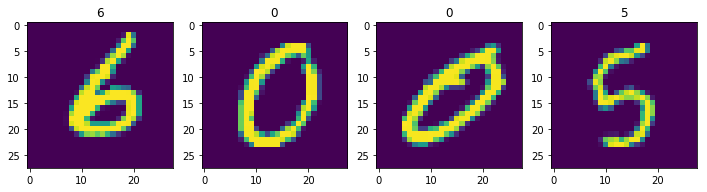

In [13]:
plots(imgs, titles=titles)
plt.show()

## Examine wrong predictions


In [14]:
# convert category vector into category label
Y_test_ids = Y_test.argmax(axis=1)

# compare the predicted and actual category labels to find error predictions
errors = np.array(Y_test_ids) - np.array(test_prediction_ids)

# gather all the wrong prediction indices
errors_idx = np.nonzero(errors)[0]

In [15]:
n_view = 4

random_idx = np.random.permutation(range(0,len(errors_idx)))[:n_view]

# grab a sampling of error indices 
random_errors_idx = errors_idx[random_idx]

# and prepare their images and labels
imgs = X_test[random_errors_idx,:].reshape(n_view, X_train_raw.shape[1], X_train_raw.shape[2])
titles = test_prediction_ids[random_errors_idx]

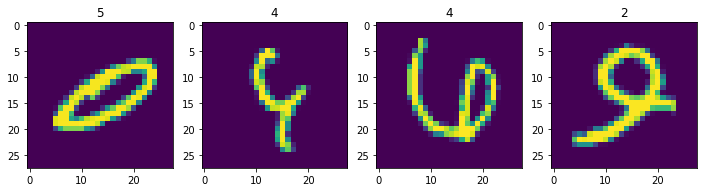

In [16]:
plots(imgs, titles=titles)
plt.show()

In [17]:
len(errors_idx) / 10000.


0.0307